# INFO 7390 - Advances in Data Sciences and Architecture

## Name - Ashish Bais 

## NUID - 001221790 

# Stock Price Prediction

### License for text in this document

CC-BY-SA © Ashish Bais 2018, Some Rights Reserved Except where otherwise noted, this work is licensed under Creative Commons Attribution-ShareAlike 3.0. You are free:
* to Share — to copy, distribute and transmit the work
* to Remix — to adapt the work Under the following conditions:
*Attribution. You must attribute the work in the manner specified by the author or licensor (but not in any way that suggests that they endorse you or your use of the work).
* Share Alike. If you alter, transform, or build upon this work, you may distribute the resulting work only under the same, similar or a compatible license.
* For any reuse or distribution, you must make clear to others the license terms of this work. The best way to do this is with a link to this web page.
* Any of the above conditions can be waived if you get permission from the copyright holder.
* Nothing in this license impairs or restricts the author's moral rights.

## Project Code - MLP

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
normalize = MinMaxScaler()
from matplotlib import pyplot as plt

### Importing csv data and dropping date field

In [2]:
stocks = pd.read_csv(r'/Users/avbais/Documents/data.csv')
stocks = stocks.drop(['DATE'], 1)
print(stocks)

           SP500  NASDAQ.AAL  NASDAQ.AAPL  NASDAQ.ADBE  NASDAQ.ADI  \
0      2363.6101     42.3300     143.6800     129.6300     82.0400   
1      2364.1001     42.3600     143.7000     130.3200     82.0800   
2      2362.6799     42.3100     143.6901     130.2250     82.0300   
3      2364.3101     42.3700     143.6400     130.0729     82.0000   
4      2364.8501     42.5378     143.6600     129.8800     82.0350   
5      2365.6201     42.5399     143.7800     130.0700     82.0400   
6      2365.2000     42.4700     143.8640     130.1800     82.1200   
7      2365.2900     42.4700     143.8100     130.1400     82.1900   
8      2364.3201     42.3900     143.8150     130.1000     82.2300   
9      2364.6399     42.3300     143.8000     130.2100     82.1650   
10     2364.5801     42.4000     143.8900     130.1400     82.2100   
11     2364.4800     42.2900     143.9700     130.3700     82.1500   
12     2365.2300     42.2900     143.9199     130.4599     82.1450   
13     2365.6599    

### Setting Variables and Parameters 

In [3]:
total_stocks = 500 #Number of Stocks
nb_epoch = 1 #No of trainings
batch_size = 256 #Setting batch size for data

### Assigning placeholders x and y 

In [4]:
(x,y) = (tf.placeholder(dtype=tf.float32, shape=[None, total_stocks]),tf.placeholder(dtype=tf.float32, shape=[None]))

### Initializing weights and bias 

In [5]:
random_starting_weights = tf.variance_scaling_initializer()
random_starting_bias = tf.zeros_initializer()

### Assigning layers

In [6]:
#Receptor Layer
layer1_size = 1024
weight1 = tf.Variable(random_starting_weights([total_stocks, layer1_size]))
bias1 = tf.Variable(random_starting_bias([layer1_size]))
hidden1 = tf.nn.relu(tf.add(tf.matmul(x, weight1), bias1))

#First Layer
layer2_size = 512
weight2 = tf.Variable(random_starting_weights([layer1_size, layer2_size]))
bias2 = tf.Variable(random_starting_bias([layer2_size]))
hidden2 = tf.nn.relu(tf.add(tf.matmul(hidden1, weight2), bias2))

#Second layer
layer3_size =256
weight3 = tf.Variable(random_starting_weights([layer2_size, layer3_size]))
bias3 = tf.Variable(random_starting_bias([layer3_size]))
hidden3 = tf.nn.relu(tf.add(tf.matmul(hidden2, weight3), bias3))

#Third layer
layer4_size = 128
weight4 = tf.Variable(random_starting_weights([layer3_size, layer4_size]))
bias4 = tf.Variable(random_starting_bias([layer4_size]))
hidden4 = tf.nn.relu(tf.add(tf.matmul(hidden3, weight4), bias4))

#Output layer
output_size = 1
output_weight = tf.Variable(random_starting_weights([layer4_size, output_size]))
output_bias = tf.Variable(random_starting_bias([output_size]))
output = tf.transpose(tf.add(tf.matmul(hidden4, output_weight), output_bias))

### Calculating Error and Minimizing Error 

In [7]:
error = tf.reduce_mean(tf.squared_difference(output, y)) #Calculating error
optimizer = tf.train.AdamOptimizer().minimize(error) #Algorithm to minimize error during backpropogation

###  Initializing and running the session

In [8]:
nn = tf.Session()
nn.run(tf.global_variables_initializer())

In [9]:
stocks = stocks.values
(r,c) = stocks.shape

### Selecting Training and Testing Data 

In [10]:
tr_st = 0 #Starting from zero
tr_fin = int(np.floor(0.8*r)) #Selecting 80% of data for training
tst_st = tr_fin #Starting testing data
tst_fin = r #Testing data till end
(trainstock, teststock) = (stocks[np.arange(tr_st, tr_fin), :],stocks[np.arange(tst_st, tst_fin), :]) #Assigning train and test data

In [11]:
#Normalizing test and test data
normalize.fit(trainstock)
(trainstock,teststock) = (normalize.transform(trainstock),normalize.transform(teststock))

In [12]:
#Assigning train and test data
(x_train,y_train ) = (trainstock[:, 1:],trainstock[:, 0])
(x_test,y_test ) = (teststock[:, 1:],teststock[:, 0])

In [13]:
#Seleting all transactions in 1 epoche for batch size
for i in range(nb_epoch):
    shuffle_indices = np.random.permutation(np.arange(len(y_train)))
    x_train = x_train[shuffle_indices]
    y_train = y_train[shuffle_indices]
    for j in range(0, len(y_train) // batch_size):
        start = j * batch_size
        xb = x_train[start:start + batch_size]
        yb = y_train[start:start + batch_size]
        nn.run(optimizer, feed_dict={x: xb, y: yb})

### Calculating Error and Accuracy 

In [14]:
final_error = nn.run(error, feed_dict={x: x_test, y: y_test})
print("Final error is: " + str(final_error))
print("Accuracy is: " + str((1 - final_error)*100) + "%")

Final error is: 0.00951563
Accuracy is: 99.0484373644%


### Plotting Accuracy 


All values shown in a graph

Comparision of predicted and actual test values


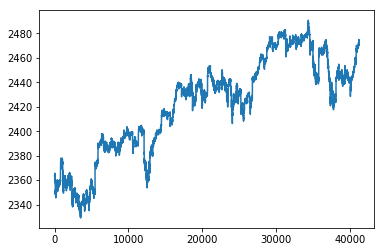

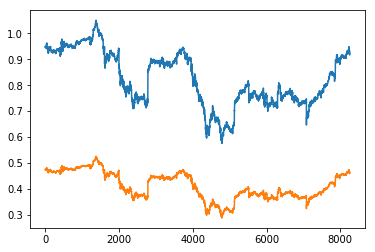

In [15]:
print('')
print('All values shown in a graph')
plt.plot(stocks[:,0])

print('')
print('Comparision of predicted and actual test values')
plt.ion()
fig = plt.figure()
ax1 = fig.add_subplot(111)
line1, = ax1.plot(y_test)
line2, = ax1.plot(y_test*0.5)
plt.show()

First plot represents the stock price over all line items for that particular stock.

Second plot represents the test price and predicted price for a sample stock.

### References

[1] Volodymyr Turchenko, Patrizia Beraldi, Francesco De Simone, Lucio Grandinetti “Short-term stock price prediction using MLP” September 2011. 

[2] A. Victor Devadoss, T. Anthony Alphonnse Ligori “Forecasting of Stock Prices Using Multilayer Perceptron” December 2013.

[3] Mahdi Pakdaman Naeini, Hamidreza Taremian, Homa Baradaran Hashemi “Stock Market Value Prediction Using Neural Networks”, 2010 

[4] Ayoele A. Adebiyi, Aderemi O. Adewumi, Charles K. Ayo “Stock Price Prediction Using ARIMA Model” 2014

[5] Lin H. “Stock Market Prediction Investigation” 2013

[6] Arik S., Eryilmaz B. 2013. Stock Prediction and Portfolio Optimization

[7] https://en.wikipedia.org/wiki/Multilayer_perc eptron

[8] Jason Brownlee “How to create ARIMA model for time series forecasting in python” January 2017